In [60]:
import numpy as np
import pandas as pd

In [61]:
df=pd.read_csv(r"C:\Users\DAKSH\Desktop\EDA\Bangalore Rapido Ride Services Dataset.csv", low_memory=False)

In [62]:
df.head(5)

,services,date,time,ride_hours,ride_status,source,destination,duration(min),ride_id,distance(KM),ride_charge(INR),misc_charge(INR),total_fare(INR),payment_method
0,Cab Economy,15-07-2024,08:30:41,NaN,Completed,Balagere Harbor,Harohalli Nagar,39,RD3161218751875354,27.21,764.83,31.51,796.34,Amazon Pay
1,Auto,05-07-2024,23:36:52,NaN,Completed,Basavanagudi 3rd Block,Bikasipura 1st Stage,89,RD8171514284594096,34.03,314.83,49.52,364.35,Paytm
2,Auto,23-07-2024,11:05:38,NaN,Cancelled,Babusapalya Cove,Kothaguda Terrace,25,RD9376481122237926,20.24,522.42,24.96,547.39,Null
3,Cab Economy,24-06-2024,08:45:11,NaN,Completed,Mahadevapura Mews,Kanakapura Arc,89,RD3676889143182765,31.17,484.73,15.84,500.57,Cash
4,Cab Economy,15-07-2024,00:26:45,NaN,Completed,Ganganagar Cove,Basaveshwaranagar Colony,95,RD6639410275948084,27.21,663.50,14.13,677.63,Amazon Pay


In [5]:
 #All rides sourced from HSR Layout
df_1=df[df['source'].str.contains('HSR Layout')]                      


In [6]:
#Unique entries in the database
df.nunique()                                               

services                5
date                   61
time                38006
ride_hours              0
ride_status             2
source              12982
destination         12977
duration(min)         110
ride_id             50000
distance(KM)         4901
ride_charge(INR)    35870
misc_charge(INR)     5001
total_fare(INR)     35949
payment_method          5
dtype: int64

In [7]:
 #Sum of all Cancelled/Completed rides#
df.groupby(by='ride_status').ride_status.count()                      

ride_status
Cancelled     5036
Completed    44964
Name: ride_status, dtype: int64

In [8]:
#Visualizing the statement with the help of Seaborn Library
import matplotlib.pyplot as plt
import seaborn as sns

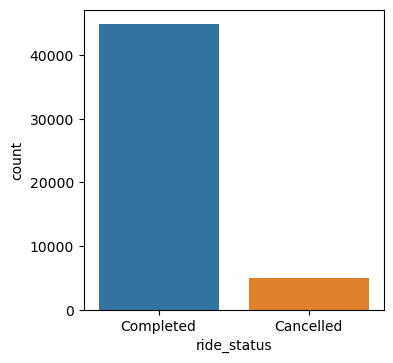

In [9]:
fig=plt.figure(figsize=(3,3))
axes=fig.add_axes([0,0,1,1])
axes.set_ylabel('Rides')
axes.set_xlabel('Status')
sns.countplot(x=df['ride_status'])
plt.show()

In [10]:
##PEAK HOURS OF RIDE##
#We can divide the hours from- 00:00:00 to 09:59:59, 10:00:00 to 19:59:59 and 20:00:00 to 23:59:59 respectively

In [11]:
#TIME STAMP ( 00:00:00 to 09:59:59)
df_filtered = df[df['time'].str.contains(r'^0', na=False)]
df_filtered['time'].value_counts().sum()

20869

In [12]:
#TIME STAMP (10:00:00 to 19:59:59)
df_filtered = df[df['time'].str.contains(r'^1', na=False)]
df_filtered['time'].value_counts().sum()

20876

In [13]:
#TIME STAMP (20:00:00 to 23:59:59)
df_filtered = df[df['time'].str.contains(r'^2', na=False)]
df_filtered['time'].value_counts().sum()

8255

In [14]:
#10:00:00- 19:59:59 had the highest number of rides 

In [15]:
df['time'].value_counts()

time
09:10:02    6
03:29:00    6
02:11:37    5
09:01:17    5
09:37:40    5
           ..
01:35:01    1
18:12:28    1
13:56:40    1
23:01:33    1
08:53:26    1
Name: count, Length: 38006, dtype: int64

In [16]:
#Which Source area had the highest ride demand?                
df['source'].value_counts().head(1)                               

source
Kothanur Landing    23
Name: count, dtype: int64

In [17]:
 #Rides categorized as per the Services
df.groupby(by='services').services.value_counts()                         

services
Auto           12327
Bike           15128
Bike lite       4884
Cab Economy    10202
Parcel          7459
Name: count, dtype: int64

In [18]:
#Fare Analysis for unique services
df_2=df[(df['services']=='Auto') & (df['total_fare(INR)'])]   

In [19]:
df_2.head(3)

,services,date,time,ride_hours,ride_status,source,destination,duration(min),ride_id,distance(KM),ride_charge(INR),misc_charge(INR),total_fare(INR),payment_method
1,Auto,05-07-2024,23:36:52,NaN,Completed,Basavanagudi 3rd Block,Bikasipura 1st Stage,89,RD8171514284594096,34.03,314.83,49.52,364.35,Paytm
2,Auto,23-07-2024,11:05:38,NaN,Cancelled,Babusapalya Cove,Kothaguda Terrace,25,RD9376481122237926,20.24,522.42,24.96,547.39,Null
5,Auto,02-07-2024,01:28:30,NaN,Completed,HSR Layout Area,JP Nagar Viewpoint,18,RD5922205486441934,33.69,456.73,25.19,481.92,Cash


In [20]:
#We can create a barplot using Seaborn/Matplotlib

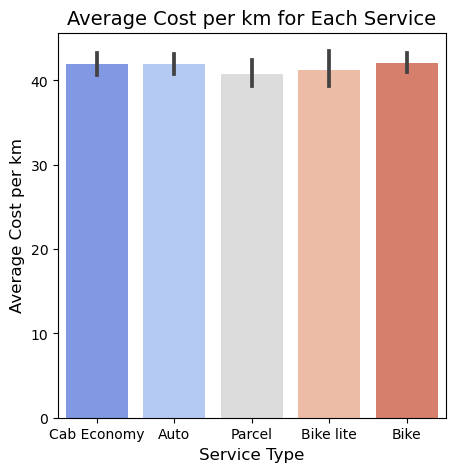

In [21]:
df['cost_per_km'] = df['ride_charge(INR)'] / df['distance(KM)']
plt.figure(figsize=(5, 5))
sns.barplot(x='services', y='cost_per_km', data=df, estimator=lambda x: sum(x) / len(x), palette='coolwarm')
plt.xlabel('Service Type', fontsize=12)
plt.ylabel('Average Cost per km', fontsize=12)
plt.title('Average Cost per km for Each Service', fontsize=14)
plt.show()


In [22]:
df.head(2)

,services,date,time,ride_hours,ride_status,source,destination,duration(min),ride_id,distance(KM),ride_charge(INR),misc_charge(INR),total_fare(INR),payment_method,cost_per_km
0,Cab Economy,15-07-2024,08:30:41,NaN,Completed,Balagere Harbor,Harohalli Nagar,39,RD3161218751875354,27.21,764.83,31.51,796.34,Amazon Pay,28.108416
1,Auto,05-07-2024,23:36:52,NaN,Completed,Basavanagudi 3rd Block,Bikasipura 1st Stage,89,RD8171514284594096,34.03,314.83,49.52,364.35,Paytm,9.251543


In [59]:
#Time taken vs Distance covered(Corelation analysis)
df['Travel_speed']= df['duration(min)']/df['distance(KM)']       
df.head(10)

,services,date,time,ride_hours,ride_status,source,destination,duration(min),ride_id,distance(KM),ride_charge(INR),misc_charge(INR),total_fare(INR),payment_method,cost_per_km,Travel_speed
0,Cab Economy,15-07-2024,08:30:41,NaN,Completed,Balagere Harbor,Harohalli Nagar,39,RD3161218751875354,27.21,764.83,31.51,796.34,Amazon Pay,28.108416,1.433297
1,Auto,05-07-2024,23:36:52,NaN,Completed,Basavanagudi 3rd Block,Bikasipura 1st Stage,89,RD8171514284594096,34.03,314.83,49.52,364.35,Paytm,9.251543,2.615339
2,Auto,23-07-2024,11:05:38,NaN,Cancelled,Babusapalya Cove,Kothaguda Terrace,25,RD9376481122237926,20.24,522.42,24.96,547.39,Null,25.811265,1.235178
3,Cab Economy,24-06-2024,08:45:11,NaN,Completed,Mahadevapura Mews,Kanakapura Arc,89,RD3676889143182765,31.17,484.73,15.84,500.57,Cash,15.551171,2.855310
4,Cab Economy,15-07-2024,00:26:45,NaN,Completed,Ganganagar Cove,Basaveshwaranagar Colony,95,RD6639410275948084,27.21,663.50,14.13,677.63,Amazon Pay,24.384417,3.491363
5,Auto,02-07-2024,01:28:30,NaN,Completed,HSR Layout Area,JP Nagar Viewpoint,18,RD5922205486441934,33.69,456.73,25.19,481.92,Cash,13.556842,0.534283
6,Cab Economy,23-07-2024,20:55:29,NaN,Completed,Arekere Heights,Dooravani Nagar Pointe,85,RD9557099396888459,20.44,836.39,14.95,851.34,GPay,40.919276,4.158513
7,Parcel,18-07-2024,13:38:34,NaN,Completed,Electronic City Village,Ganganagar Station,89,RD9473873953525644,35.31,724.76,31.34,756.10,Cash,20.525630,2.520532
8,Parcel,08-08-2024,07:59:54,NaN,Completed,Mysore Road Lane,Billekahalli 6th Block,72,RD1285566012167240,45.99,641.55,21.48,663.03,Amazon Pay,13.949772,1.565558
9,Bike lite,10-07-2024,12:30:08,NaN,Completed,Kundalahalli Alley,RT Nagar 5th Block,94,RD7238628094142076,44.43,571.50,47.63,619.13,Cash,12.862930,2.115688


In [58]:
df_new=df[(df['services']=='Auto') & (df['Travel_speed'])]
df_new['Travel_speed'].mean()


#This implies; If someone opts for Auto, it'll take avg. of 5minutes to cover 1km of distance(Keeping other factors comparative)

5.141741624711738

In [25]:
#Payment Preference Across Service Types (Auto vs. Cab Economy)
df.groupby(by='services').payment_method.value_counts()


services     payment_method
Auto         GPay              2861
             Cash              2756
             Paytm             2754
             Amazon Pay        2743
             Null              1213
Bike         Cash              3405
             Amazon Pay        3403
             Paytm             3403
             GPay              3356
             Null              1561
Bike lite    Amazon Pay        1144
             Paytm             1112
             GPay              1082
             Cash              1050
             Null               496
Cab Economy  Paytm             2348
             GPay              2283
             Amazon Pay        2267
             Cash              2250
             Null              1054
Parcel       Paytm             1698
             Cash              1695
             GPay              1686
             Amazon Pay        1668
             Null               712
Name: count, dtype: int64

In [26]:
#Analysis for "Cash" payments over Auto vs Cab Economy

In [27]:
df_0=df[(df['services']=='Auto') & (df['payment_method']=='Cash')]
df_0.payment_method.value_counts()

payment_method
Cash    2756
Name: count, dtype: int64

In [28]:
df_0=df[(df['services']=='Cab Economy') & (df['payment_method']=='Cash')]
df_0.payment_method.value_counts()

payment_method
Cash    2250
Name: count, dtype: int64

In [29]:
#Analysis for "Cashless" payments over Auto vs Cab EconomyS

In [30]:
df_0=df[(df['services']=='Auto') & (df['payment_method']!='Cash')]
df_0.payment_method.value_counts().sum()

9571

In [31]:
df_0=df[(df['services']=='Cab Economy') & (df['payment_method']!='Cash')]
df_0.payment_method.value_counts().sum()

7952

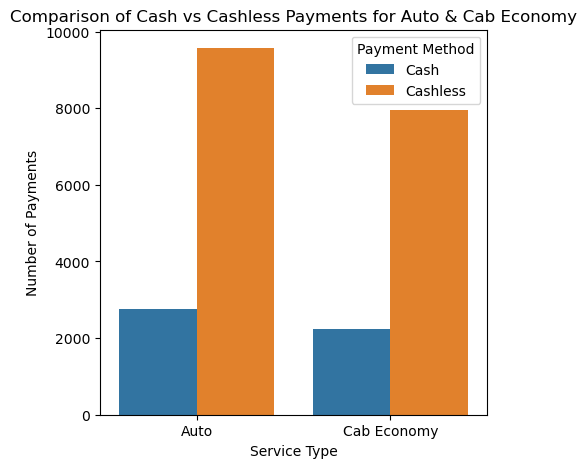

In [32]:
services = ['Auto', 'Auto', 'Cab Economy', 'Cab Economy']
payment_methods = ['Cash', 'Cashless', 'Cash', 'Cashless']
counts = [2756, 9571, 2250, 7952]

plt.figure(figsize=(5, 5))
sns.barplot(x=services, y=counts, hue=payment_methods)
plt.xlabel("Service Type")
plt.ylabel("Number of Payments")
plt.title("Comparison of Cash vs Cashless Payments for Auto & Cab Economy")
plt.legend(title="Payment Method")
plt.show()
